## Install Libraries

In [1]:
pip install keract

Note: you may need to restart the kernel to use updated packages.


## Importing Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image
import os
import keract
from keract import get_activations, display_activations
import seaborn as sns

## Input Data, Assigning Path and Randomise the input

In [3]:
# Reading the input images and putting them into a numpy array
data=[]
labels=[]

height = 30
width = 30
channels = 3
classes = 43
n_inputs = height * width*channels

for i in range(classes) :
    path = r"Train/{0}/".format(i)
    #print(path)
    Class=os.listdir(path)
    for a in Class:
        try:
          image=cv2.imread(path+a)
          image_from_array = Image.fromarray(image, 'RGB')
          size_image = image_from_array.resize((height, width))
          data.append(np.array(size_image))
          labels.append(i)
        except AttributeError:
            print(" ")
            
Cells=np.array(data)
labels=np.array(labels)

#Randomize the order of the input images
s=np.arange(Cells.shape[0])
np.random.seed(43)
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

## Types of Classes

In [4]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

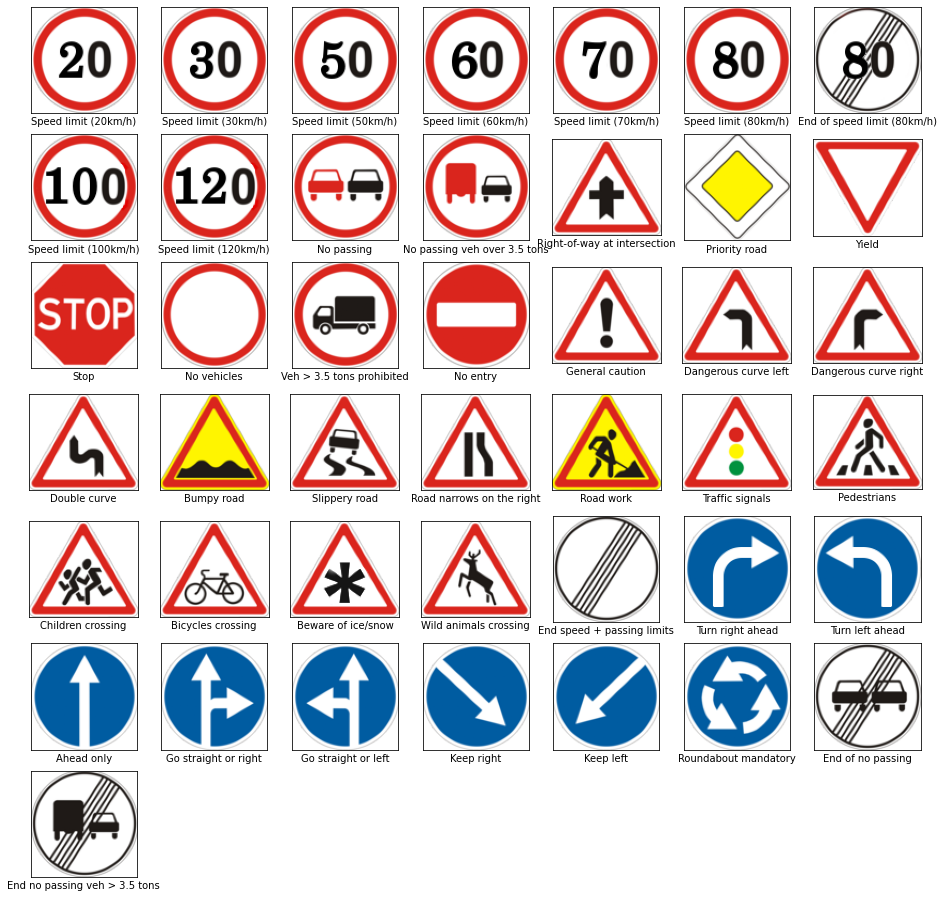

In [5]:
plt.figure(figsize=(16,16))
path_img = r"meta/".format(i)
for i in range (0,43):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img_path = path_img+ '/{0}.png'.format(i)
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.xlabel(classes.get(i))

## Visualizing Input Dataset

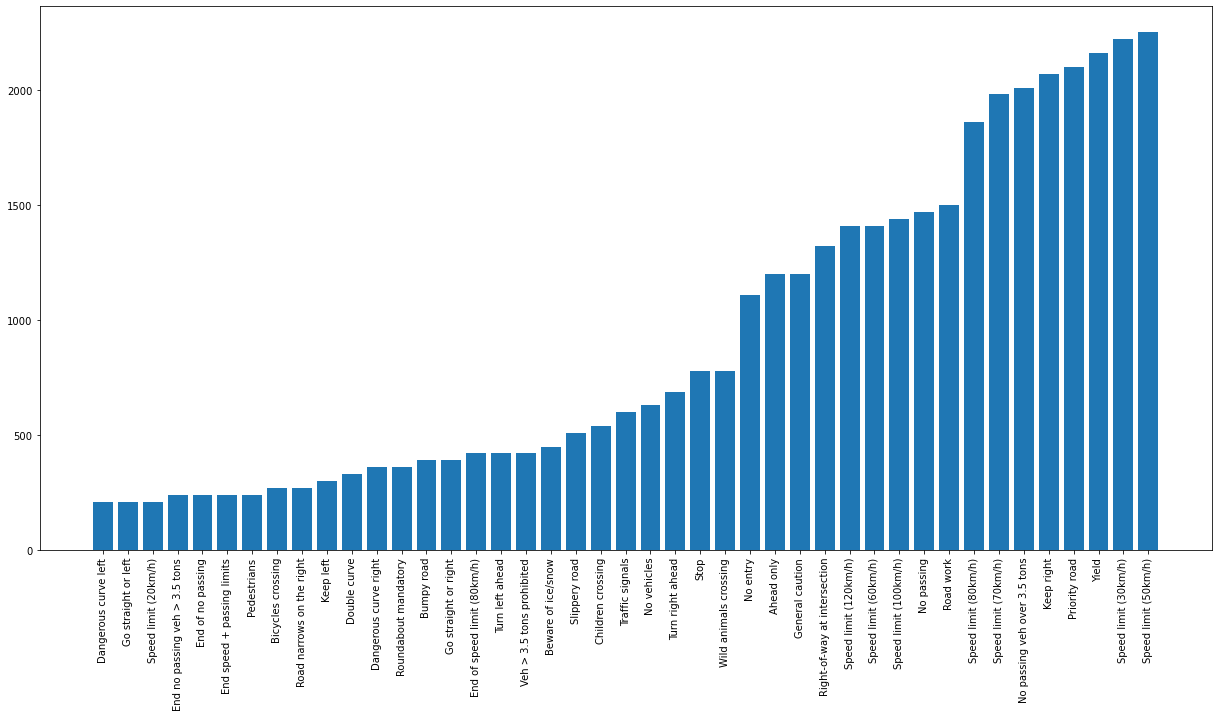

In [6]:
train_path = r'Train'
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

## Train and validation Split

In [7]:
#Spliting the images into train and validation sets
(X_train,X_val)=Cells[(int)(0.2*len(labels)):],Cells[:(int)(0.2*len(labels))]
X_train = X_train.astype('float32')/255 
X_val = X_val.astype('float32')/255
(y_train,y_val)=labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]

#Using one hot encoding for the train and validation labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)
print(X_train.shape,
      y_train.shape)

(31368, 30, 30, 3) (31368, 43)


## Loading the Test Data

In [8]:
test = pd.read_csv("Test.csv")
#y_test
test_labels = test["ClassId"].values
#x_test
test_imgs = test["Path"].values

test_data =[]

for path in test_imgs:
   image = Image.open(path)
   image = image.resize((30,30))
   test_data.append(np.array(image))
testdata = np.array(test_data)
testdata = testdata/255


# Multilayer Perceptron (MLP) Classifier

In [19]:
from sklearn.neural_network import MLPClassifier

## Reshaping the Train and validation Dataset to structure that can be an input to NN

In [20]:
# Reshaping the Training and Validation Dataset
X_train1 = X_train.reshape(31368, 2700)
X_val1 = X_val.reshape(7841, 2700 )

In [11]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=(50,25,10),
                       max_iter=250,
                       early_stopping=True)

mlp_clf.fit(X_train1,y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(50, 25, 10),
              max_iter=250)

In [21]:
# Classification Matrix
val_y_pred = mlp_clf.predict(X_val1)

In [22]:
# 1. CONFUSION MATRIX - Validation Dataset
from sklearn.metrics import confusion_matrix

confusion_matrix(X_val1.argmax(axis=1), val_y_pred.argmax(axis=1))

array([[76, 31, 19, ...,  0,  0,  0],
       [ 7,  2,  5, ...,  0,  0,  0],
       [ 8,  4,  3, ...,  0,  0,  0],
       ...,
       [ 1,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [26]:
# Accuracy Score - Validation Dataset
from sklearn.metrics import accuracy_score

print('Validation Dataset- Accuracy Score:',accuracy_score(y_val, val_y_pred)*100)


Validation Dataset- Accuracy Score: 79.07154699655656


In [15]:
# Reshaping the Testing Dataset
testdata1=testdata.reshape(12630,30*30*3)

In [25]:
#Accuracy Score - Testing Dataset
test_y_pred=np.argmax(mlp_clf.predict(testdata1),axis=1)
print('Validation Dataset- Accuracy Score:',accuracy_score(test_labels,test_y_pred)*100)

Validation Dataset- Accuracy Score: 17.110055423594616


# Traditonal Sequential Model

In [33]:
import keras
import keras.utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import SGD, Adam

In [34]:
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [313,28, 28]),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(70, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(43, activation = 'softmax')
])
# compiling model

model2.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

In [35]:
batch_size = 50
epochs = 20

model1 = Sequential()
model1.add(Dense(128, activation='relu', input_shape=(2700,)))
#model1.add(Dropout(0.2))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Flatten())
#model1.add(Dropout(0.25))
model1.add(Dense(43, activation='softmax'))
#opt = SGD(learning_rate=0.01, momentum=0.9)



# compiling model
opt =Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False,name="Adam")
model1.compile(loss='categorical_crossentropy',
optimizer=opt,
metrics=['accuracy'])

In [36]:
history = model1.fit(X_train1, y_train,
batch_size=batch_size,
epochs=epochs,
verbose=1,validation_data=(X_val1, y_val))

Epoch 1/20
628/628 [==============================] - 2s 2ms/step - loss: 1.9778 - accuracy: 0.4356 - val_loss: 1.2443 - val_accuracy: 0.6080
Epoch 2/20
628/628 [==============================] - 1s 2ms/step - loss: 0.8847 - accuracy: 0.7308 - val_loss: 0.8013 - val_accuracy: 0.7502
Epoch 3/20
628/628 [==============================] - 1s 2ms/step - loss: 0.6152 - accuracy: 0.8104 - val_loss: 0.5671 - val_accuracy: 0.8263
Epoch 4/20
628/628 [==============================] - 1s 2ms/step - loss: 0.4851 - accuracy: 0.8506 - val_loss: 0.5342 - val_accuracy: 0.8303
Epoch 5/20
628/628 [==============================] - 1s 2ms/step - loss: 0.4046 - accuracy: 0.8750 - val_loss: 0.5022 - val_accuracy: 0.8454
Epoch 6/20
628/628 [==============================] - 1s 2ms/step - loss: 0.3644 - accuracy: 0.8850 - val_loss: 0.3943 - val_accuracy: 0.8815
Epoch 7/20
628/628 [==============================] - 1s 2ms/step - loss: 0.3424 - accuracy: 0.8954 - val_loss: 0.3834 - val_accuracy: 0.8853
Epoch 

In [37]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 128)               345728    
_________________________________________________________________
dense_24 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_25 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_26 (Dense)             (None, 64)                8256      
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               8320      
_________________________________________________________________
flatten_4 (Flatten)          (None, 128)              

In [39]:
# Evaluating the model using Validation Dataset
score = model1.evaluate(X_val1,y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2424151599407196
Test accuracy: 0.9301109313964844


In [38]:
#Evaluating the model using Test Dataset
test_labels1=to_categorical(test_labels,43)
score = model1.evaluate(testdata1,test_labels1, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 7.565643787384033
Test accuracy: 0.35209816694259644


## CNN Model

In [40]:
#Definition of the CNN model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))


#Compilation of the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)


In [41]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        51264     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)         

In [ ]:
#using 15 epochs for the training and saving the accuracy for each epoch
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,
validation_data=(X_val, y_val))

Epoch 1/15
981/981 [==============================] - 47s 48ms/step - loss: 1.2506 - accuracy: 0.6466 - val_loss: 0.1434 - val_accuracy: 0.9610
Epoch 2/15
981/981 [==============================] - 57s 58ms/step - loss: 0.2260 - accuracy: 0.9300 - val_loss: 0.0592 - val_accuracy: 0.9851
Epoch 3/15
981/981 [==============================] - 58s 59ms/step - loss: 0.1466 - accuracy: 0.9567 - val_loss: 0.0544 - val_accuracy: 0.9853
Epoch 4/15
144/981 [===>..........................] - ETA: 49s - loss: 0.1092 - accuracy: 0.9696- ETA: 50s - loss:

In [ ]:
#Display of the accuracy and the loss values
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

## Running the predictions on Test Data

In [ ]:
pred =  np.argmax(model.predict(testdata),axis=1)

from sklearn.metrics import accuracy_score
print ('Test Data accuracy: ',accuracy_score(test_labels, pred)*100)


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cf= confusion_matrix(test_labels, pred)

In [ ]:
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

# Interpretability and Visualization

In [ ]:
import keract
from keract import get_activations, display_activations
CNN_layers = [layer.name for layer in model.layers]
activations = get_activations(model, X_train[1:2],layer_names=CNN_layers[3])
keract.display_activations(activations, save=False)